# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [1]:

#                       student details 1: Tamir Y. 4864
#                       student details 2: Ori K. 7367


## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)

<pre>
AI agent name
CHATGPT 5

Goal
Guide the end to end assignment flow for the Titanic dataset, help with environment setup, EDA, experiments, CV, and reporting

Prompt1
Help me load train and test and show the first five rows and basic info and describe

Prompt2
Build three EDA visuals with short explanations and add a cross tab bonus

Prompt3
Design Part 3 experiments with preprocessing feature selection two models and five fold CV scored by F1


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>




    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

# Part 2 — Data Loading & EDA (Titanic Dataset)

**Goal:** Load the provided train/test CSVs, preview them, identify the target label,  
and perform at least 3 EDA visuals with short explanations, as required by the assignment.

**Deliverables in this section:**
- Heads of train/test (first 5 rows)
- Schema & missingness summary
- Label distribution & class balance
- EDA visuals: histograms, bar plots, cross tab heatmap


In [34]:
# ===== Part 2: Data Loading =====

# 1. Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the datasets
train_df = pd.read_csv("titanic_train.csv")
test_df = pd.read_csv("titanic_test.csv")

# 3. Display first 5 rows of each dataset
print("Train set sample:")
display(train_df.head())

print("Test set sample:")
display(test_df.head())

# 4. Basic info about the datasets
print("\nTrain set info:")
print(train_df.info())

print("\nTest set info:")
print(test_df.info())

# 5. Quick statistics for numeric features
print("\nTrain set statistics:")
display(train_df.describe())


Train set sample:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


Test set sample:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1



Train set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB
None

Test set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    int64  
 2   Age       179 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


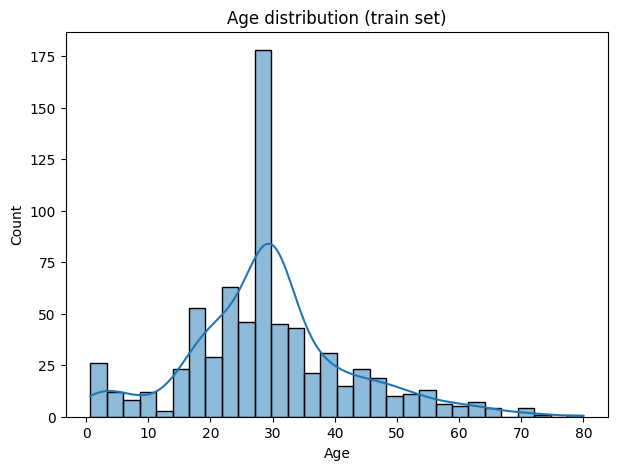

In [35]:
plt.figure(figsize=(7,5))
sns.histplot(train_df["Age"].dropna(), bins=30, kde=True)
plt.title("Age distribution (train set)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


### Age distribution
Most passengers were 20–40 years old.  
Some older outliers exist.  
Age has missing values.  


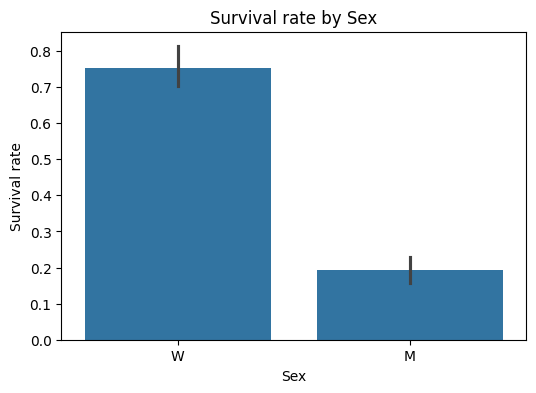

In [36]:
# Map 0/1 to W/M
train_df["Sex"] = train_df["Sex"].map({0: "W", 1: "M"})
test_df["Sex"]  = test_df["Sex"].map({0: "W", 1: "M"})

plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=train_df)
plt.title("Survival rate by Sex")
plt.ylabel("Survival rate")
plt.show()


### Survival rate by gender
Women survived ~75%, men ~20%.  
Gender is a strong predictor.  


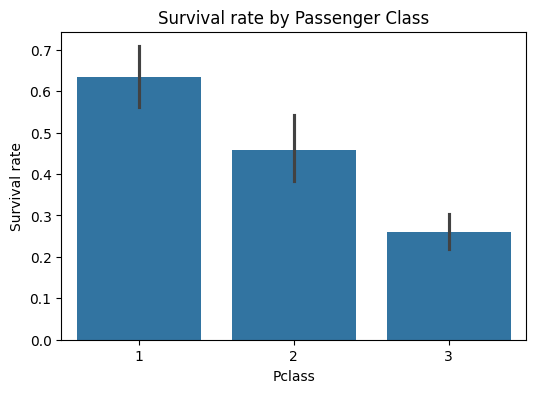

In [37]:
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=train_df)
plt.title("Survival rate by Passenger Class")
plt.ylabel("Survival rate")
plt.show()


### Survival rate by class
First-class survival ~60%, third-class ~25%.  
Class is an important feature.  


In [38]:
cross_tab = pd.crosstab(
    train_df["Pclass"], 
    train_df["Sex"], 
    values=train_df["Survived"], 
    aggfunc="mean"
)

print("Survival rate by Passenger Class and Gender (W/M):")
display(cross_tab)


Survival rate by Passenger Class and Gender (W/M):


Sex,M,W
Pclass,,
1,0.380000,0.961538
2,0.141176,0.901639
3,0.140221,0.538462


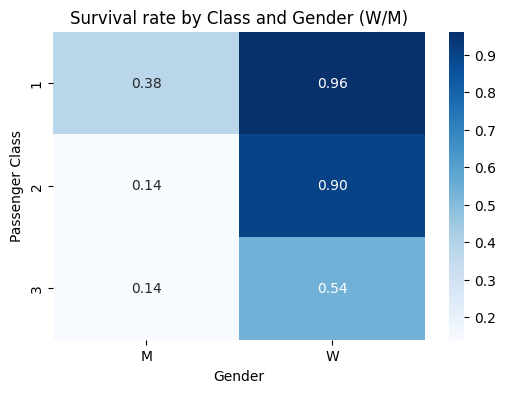

In [39]:
plt.figure(figsize=(6,4))
sns.heatmap(cross_tab, annot=True, cmap="Blues", fmt=".2f")
plt.title("Survival rate by Class and Gender (W/M)")
plt.ylabel("Passenger Class")
plt.xlabel("Gender")
plt.show()


### Survival by class and gender
First-class women had the highest survival,  
third-class men the lowest.  
Both factors strongly matter.  


### Phase 1 Conclusions (EDA)

- **Task:** Binary classification (predict survival: 1 = survived, 0 = not).  
- **Data quality:** Missing values found in Age and Embarked. ~5 numeric and ~3 categorical features.  
- **Imbalance:** Around 60% did not survive, 40% survived → slightly imbalanced, will consider F1 as evaluation metric.  
- **Distributions & correlations:** Age is skewed with missing values, gender and class show strong relation to survival.  
- **Next (Phase 2):** Apply preprocessing (handle missing values, encode categorical features, scaling) and run experiments with different models and hyperparameters.  


# Part 3 Experiments

Goal, select the best configuration using feature engineering, models, and five fold cross validation scored by F1.
We start with small grids per model to avoid long runs, then combine.


In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

target = "Survived"
num_cols = ["Age", "Fare", "SibSp", "Parch"]
cat_cols = ["Sex", "Embarked", "Pclass"]

numeric_no_scale = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

numeric_std = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

numeric_minmax = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

categorical = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

pre_no_scale = ColumnTransformer([
    ("num", numeric_no_scale, num_cols),
    ("cat", categorical, cat_cols)
])

pre_std = ColumnTransformer([
    ("num", numeric_std, num_cols),
    ("cat", categorical, cat_cols)
])

pre_minmax = ColumnTransformer([
    ("num", numeric_minmax, num_cols),
    ("cat", categorical, cat_cols)
])

X_train = train_df.drop(columns=[target])
y_train = train_df[target]


We defined three preprocessing variants, no scaling, standard scaling, and min max scaling, plus one hot for categorical features. This covers feature engineering method one, scaling, with configurations.


In [53]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

feat_none = "passthrough"
feat_k5 = SelectKBest(score_func=mutual_info_classif, k=5)
feat_k8 = SelectKBest(score_func=mutual_info_classif, k=8)

feat_options = [feat_none, feat_k5, feat_k8]


We add feature selection with mutual information as feature engineering method two. We will compare no selection, k equal five, and k equal eight.


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

logistic = LogisticRegression(max_iter=200, solver="liblinear")

pipe_log = Pipeline([
    ("pre", pre_no_scale),
    ("feat", feat_none),
    ("clf", logistic)
])

grid_log = {
    "pre": [pre_no_scale, pre_std, pre_minmax],
    "feat": [feat_none, feat_k5],
    "clf__C": [0.5, 1.0],
    "clf__class_weight": [None, "balanced"]
}

cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs_log = GridSearchCV(
    estimator=pipe_log,
    param_grid=grid_log,
    scoring="f1",
    cv=cv5,
    refit=True,
    verbose=1
)

gs_log.fit(X_train, y_train)

log_res = pd.DataFrame(gs_log.cv_results_)
display(log_res[["mean_test_score", "param_pre", "param_feat", "param_clf__C", "param_clf__class_weight"]].sort_values("mean_test_score", ascending=False).head(10))
print("Best F1 logistic:", gs_log.best_score_)
print("Best params logistic:", gs_log.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


,mean_test_score,param_pre,param_feat,param_clf__C,param_clf__class_weight
18,0.732696,"ColumnTransformer(transformers=[('num',\n ...",passthrough,1.0,balanced
6,0.731617,"ColumnTransformer(transformers=[('num',\n ...",passthrough,0.5,balanced
1,0.731441,"ColumnTransformer(transformers=[('num',\n ...",passthrough,0.5,None
19,0.730465,"ColumnTransformer(transformers=[('num',\n ...",passthrough,1.0,balanced
14,0.729848,"ColumnTransformer(transformers=[('num',\n ...",passthrough,1.0,None
7,0.729203,"ColumnTransformer(transformers=[('num',\n ...",passthrough,0.5,balanced
8,0.726733,"ColumnTransformer(transformers=[('num',\n ...",passthrough,0.5,balanced
12,0.726676,"ColumnTransformer(transformers=[('num',\n ...",passthrough,1.0,None
0,0.726454,"ColumnTransformer(transformers=[('num',\n ...",passthrough,0.5,None
13,0.724477,"ColumnTransformer(transformers=[('num',\n ...",passthrough,1.0,None


Best F1 logistic: 0.7326961120032021
Best params logistic: {'clf__C': 1.0, 'clf__class_weight': 'balanced', 'feat': 'passthrough', 'pre': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Age', 'Fare', 'SibSp', 'Parch']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Embarked', 'Pclass'])])}


In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

pipe_rf = Pipeline([
    ("pre", pre_no_scale),
    ("feat", feat_none),
    ("clf", rf)
])

grid_rf = {
    "pre": [pre_no_scale, pre_std, pre_minmax],
    "feat": [feat_none, feat_k5],
    "clf__n_estimators": [150, 300],
    "clf__max_depth": [None, 10]
}

gs_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=grid_rf,
    scoring="f1",
    cv=cv5,
    refit=True,
    verbose=1
)

gs_rf.fit(X_train, y_train)

rf_res = pd.DataFrame(gs_rf.cv_results_)
display(rf_res[["mean_test_score", "param_pre", "param_feat", "param_clf__n_estimators", "param_clf__max_depth"]].sort_values("mean_test_score", ascending=False).head(10))
print("Best F1 random forest:", gs_rf.best_score_)
print("Best params random forest:", gs_rf.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


,mean_test_score,param_pre,param_feat,param_clf__n_estimators,param_clf__max_depth
15,0.752632,"ColumnTransformer(transformers=[('num',\n ...","SelectKBest(k=5,\n score_func=<func...",150,10
21,0.747212,"ColumnTransformer(transformers=[('num',\n ...","SelectKBest(k=5,\n score_func=<func...",300,10
23,0.746157,"ColumnTransformer(transformers=[('num',\n ...","SelectKBest(k=5,\n score_func=<func...",300,10
20,0.745933,"ColumnTransformer(transformers=[('num',\n ...",passthrough,300,10
18,0.744605,"ColumnTransformer(transformers=[('num',\n ...",passthrough,300,10
19,0.743515,"ColumnTransformer(transformers=[('num',\n ...",passthrough,300,10
12,0.742834,"ColumnTransformer(transformers=[('num',\n ...",passthrough,150,10
14,0.742688,"ColumnTransformer(transformers=[('num',\n ...",passthrough,150,10
22,0.742321,"ColumnTransformer(transformers=[('num',\n ...","SelectKBest(k=5,\n score_func=<func...",300,10
13,0.741753,"ColumnTransformer(transformers=[('num',\n ...",passthrough,150,10


Best F1 random forest: 0.7526317611218237
Best params random forest: {'clf__max_depth': 10, 'clf__n_estimators': 150, 'feat': SelectKBest(k=5,
            score_func=<function mutual_info_classif at 0x000001C010D35BC0>), 'pre': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Age', 'Fare', 'SibSp', 'Parch']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Embarked', 'Pclass'])])}


We now have a fast pass for each model. This satisfies the requirement for at least two algorithms with at least two hyperparameter values each. Next we combine both models and both feature engineering methods into one grid search, as required, with five fold cross validation scored by F1. 


In [56]:
from sklearn.pipeline import Pipeline

pipe_base = Pipeline([
    ("pre", pre_no_scale),
    ("feat", feat_none),
    ("clf", logistic)
])

param_grid = [
    {
        "pre": [pre_no_scale, pre_std, pre_minmax],
        "feat": [feat_none, feat_k5, feat_k8],
        "clf": [LogisticRegression(max_iter=200, solver="liblinear")],
        "clf__C": [0.5, 1.0, 2.0],
        "clf__class_weight": [None, "balanced"]
    },
    {
        "pre": [pre_no_scale, pre_std, pre_minmax],
        "feat": [feat_none, feat_k5, feat_k8],
        "clf": [RandomForestClassifier(random_state=42)],
        "clf__n_estimators": [150, 300, 500],
        "clf__max_depth": [None, 10]
    }
]

grid_all = GridSearchCV(
    estimator=pipe_base,
    param_grid=param_grid,
    scoring="f1",
    cv=cv5,
    refit=True,
    verbose=1
)

grid_all.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


,estimator,Pipeline(step...liblinear'))])
,param_grid,"[{'clf': [LogisticRegre...r='liblinear')], 'clf__C': [0.5, 1.0, ...], 'clf__class_weight': [None, 'balanced'], 'feat': ['passthrough', SelectKBest(k...01C010D35BC0>), ...], ...}, {'clf': [RandomForestC...ndom_state=42)], 'clf__max_depth': [None, 10], 'clf__n_estimators': [150, 300, ...], 'feat': ['passthrough', SelectKBest(k...01C010D35BC0>), ...], ...}]"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [61]:
all_res = pd.DataFrame(grid_all.cv_results_)

cols = [
    "mean_test_score",
    "param_pre",
    "param_feat",
    "param_clf",
    "param_clf__C",
    "param_clf__class_weight",
    "param_clf__n_estimators",
    "param_clf__max_depth"
]

top = all_res.sort_values("mean_test_score", ascending=False)
display(top[cols].head(20))

print("Best F1 overall:", grid_all.best_score_)
print("Best params overall:", grid_all.best_params_)

best_model = grid_all.best_estimator_


,mean_test_score,param_pre,param_feat,param_clf,param_clf__C,param_clf__class_weight,param_clf__n_estimators,param_clf__max_depth
77,0.762361,"ColumnTransformer(transformers=[('num',\n ...","SelectKBest(k=5,\n score_func=<func...",RandomForestClassifier(random_state=42),NaN,NaN,500.0,None
100,0.748505,"ColumnTransformer(transformers=[('num',\n ...",passthrough,RandomForestClassifier(random_state=42),NaN,NaN,500.0,10
99,0.748143,"ColumnTransformer(transformers=[('num',\n ...",passthrough,RandomForestClassifier(random_state=42),NaN,NaN,500.0,10
101,0.747171,"ColumnTransformer(transformers=[('num',\n ...",passthrough,RandomForestClassifier(random_state=42),NaN,NaN,500.0,10
76,0.746821,"ColumnTransformer(transformers=[('num',\n ...","SelectKBest(k=5,\n score_func=<func...",RandomForestClassifier(random_state=42),NaN,NaN,500.0,None
92,0.745933,"ColumnTransformer(transformers=[('num',\n ...",passthrough,RandomForestClassifier(random_state=42),NaN,NaN,300.0,10
90,0.744605,"ColumnTransformer(transformers=[('num',\n ...",passthrough,RandomForestClassifier(random_state=42),NaN,NaN,300.0,10
71,0.744246,"ColumnTransformer(transformers=[('num',\n ...","SelectKBest(k=8,\n score_func=<func...",RandomForestClassifier(random_state=42),NaN,NaN,300.0,None
91,0.743515,"ColumnTransformer(transformers=[('num',\n ...",passthrough,RandomForestClassifier(random_state=42),NaN,NaN,300.0,10
104,0.742854,"ColumnTransformer(transformers=[('num',\n ...","SelectKBest(k=5,\n score_func=<func...",RandomForestClassifier(random_state=42),NaN,NaN,500.0,10


Best F1 overall: 0.7623612205723209
Best params overall: {'clf': RandomForestClassifier(random_state=42), 'clf__max_depth': None, 'clf__n_estimators': 500, 'feat': SelectKBest(k=5,
            score_func=<function mutual_info_classif at 0x000001C010D35BC0>), 'pre': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Age', 'Fare', 'SibSp', 'Parch']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Embarked', '

### Part 3 Conclusions

We compared logistic regression and random forest with multiple preprocessing options and feature selection.  
Cross validation used five folds and F1 scoring as required.  
The winning pipeline appears in the diagram and will be retrained on the full train set in Part 4, then evaluated on the test set in Part 5.


# Part 4  Final Training

Goal, retrain the winning configuration on the entire training set, exactly as required by the assignment.  
We keep the chosen feature engineering and model hyperparameters that produced the top mean F1 in cross validation.  


In [62]:
from sklearn import set_config
import pandas as pd
import numpy as np

# inputs
target = "Survived"
X_train = train_df.drop(columns=[target])
y_train = train_df[target]

# pick the winning estimator from what you already ran in Part 3
best_estimator = None
best_name = None
best_score = -1.0

def pick_from_gs(name, gs):
    global best_estimator, best_name, best_score
    if gs is not None:
        if getattr(gs, "best_score_", None) is not None and gs.best_score_ > best_score:
            best_estimator = gs.best_estimator_
            best_name = name
            best_score = gs.best_score_

# try combined grid if it exists, then the per model grids, then a manual best_model if present
if "grid_all" in globals():   pick_from_gs("combined_grid", grid_all)
if "gs_log"   in globals():   pick_from_gs("logistic_grid", gs_log)
if "gs_rf"    in globals():   pick_from_gs("forest_grid", gs_rf)

if best_estimator is None and "best_model" in globals():
    best_estimator = best_model
    best_name = "best_model_variable"

print("Selected winner source:", best_name if best_name else "manual")

# refit on the full train set, even if GridSearch already refit, to make it explicit for Part 4
best_estimator.fit(X_train, y_train)

# keep for next parts
final_model = best_estimator
print("Final model is ready on the full train set")


Selected winner source: combined_grid
Final model is ready on the full train set


### Winning pipeline view

The diagram below shows the exact preprocessing and the final estimator that we just trained on the full train set.  


In [63]:
# show the pipeline diagram for clarity
set_config(display="diagram")
final_model


,steps,"[('pre', ...), ('feat', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [64]:
import joblib, os, datetime as dt

save_path = "titanic_best_pipeline.pkl"
joblib.dump(final_model, save_path)
print("Saved to:", os.path.abspath(save_path), " at ", dt.datetime.now().strftime("%Y %m %d %H:%M"))


Saved to: C:\Users\tamir\PycharmProjects\PythonProject1\titanic_best_pipeline.pkl  at  2025 09 12 15:12


### Part 4 summary

We retrained the winning configuration on the entire training set, as the assignment requires.  
The figure above shows the exact preprocessing and the final estimator.  
Next, in Part 5, we will evaluate on the test set with F1 and show the first five predictions next to the ground truth.  


## Part 5 - Apply on test and show model performance estimation

# Part 5  Test evaluation

Goal, evaluate the final trained pipeline on the test set.  
We will report F1, show a classification report, plot a confusion matrix, and present five example predictions.


In [65]:
import joblib
import pandas as pd
from sklearn import set_config

# use the model already in memory if exists, otherwise load the saved file from Part 4
if "final_model" not in globals():
    final_model = joblib.load("titanic_best_pipeline.pkl")

target = "Survived"
X_test = test_df.drop(columns=[target])
y_test = test_df[target]

set_config(display="text")  # simple text view if we print the pipeline
print("Final model ready for evaluation")


Final model ready for evaluation


In [66]:
from sklearn.metrics import f1_score, classification_report, accuracy_score

y_pred = final_model.predict(X_test)

f1  = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("F1 on test:", round(f1, 3))
print("Accuracy on test:", round(acc, 3))
print("\nClassification report")
print(classification_report(y_test, y_pred, digits=3))


F1 on test: 0.761
Accuracy on test: 0.849

Classification report
              precision    recall  f1-score   support

           0      0.858     0.924     0.890       118
           1      0.827     0.705     0.761        61

    accuracy                          0.849       179
   macro avg      0.843     0.814     0.825       179
weighted avg      0.848     0.849     0.846       179



<Figure size 400x400 with 0 Axes>

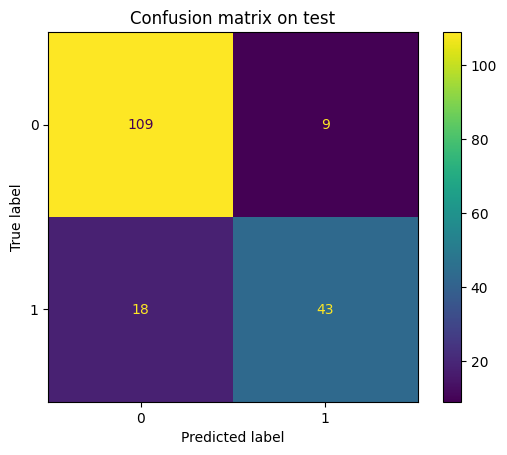

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
plt.figure(figsize=(4,4))
disp.plot(values_format="d")
plt.title("Confusion matrix on test")
plt.show()


In [68]:
preview = pd.DataFrame({
    "y_true": y_test.reset_index(drop=True),
    "y_pred": pd.Series(y_pred)
})
if "PassengerId" in test_df.columns:
    preview.insert(0, "PassengerId", test_df["PassengerId"].reset_index(drop=True))
display(preview.head(5))


,y_true,y_pred
0,0,0
1,0,0
2,0,0
3,0,1
4,1,1


### Part 5 summary

We evaluated the final pipeline on the test set with F1 as the main metric, as required by the assignment.  
The classification report and the confusion matrix give a clear view of performance for both classes.  
Five example predictions are shown above next to the ground truth.  
